(0.0, 1000000000.0)

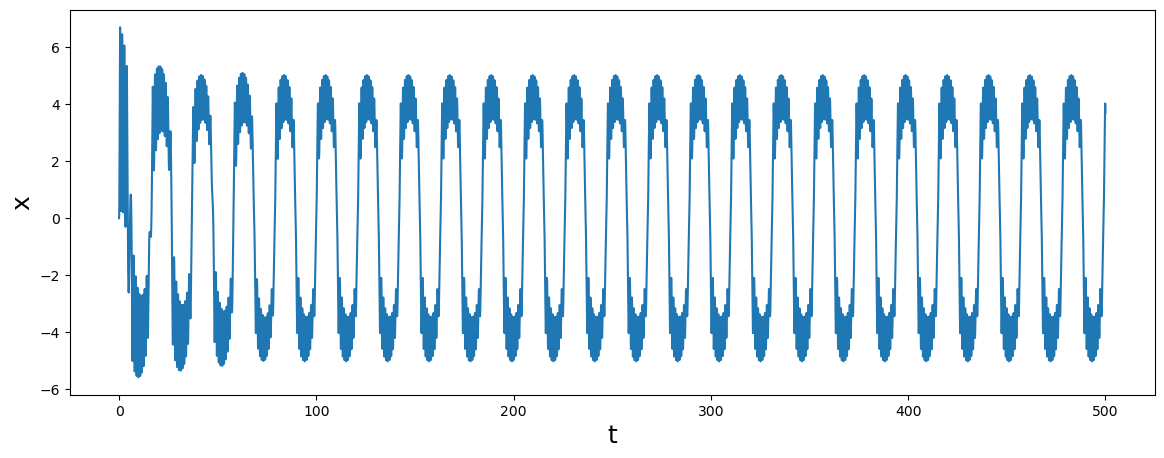

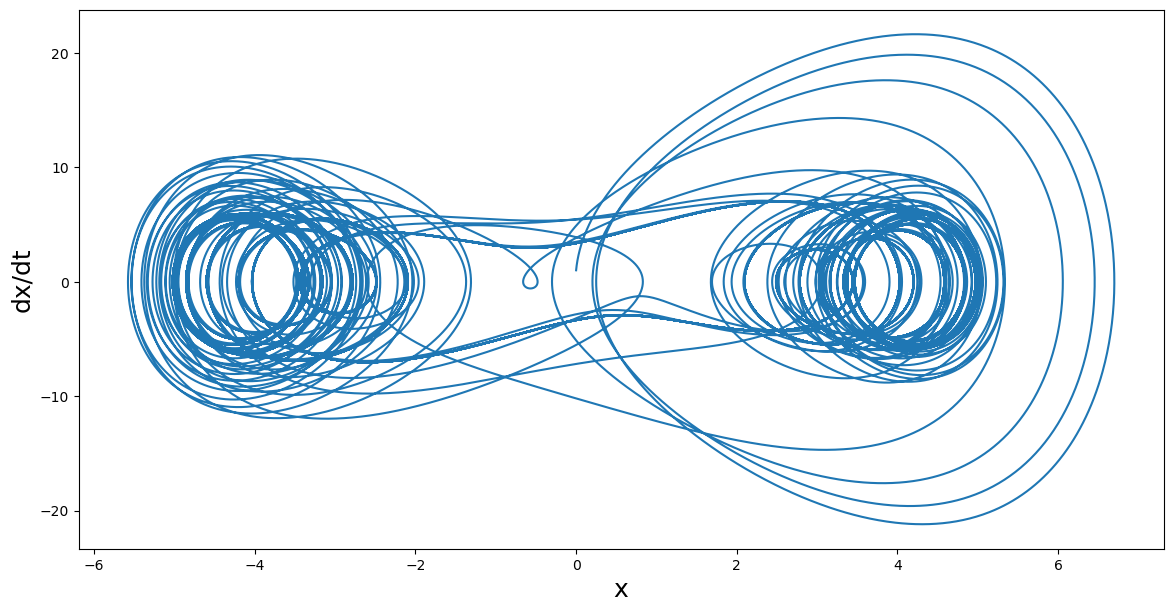

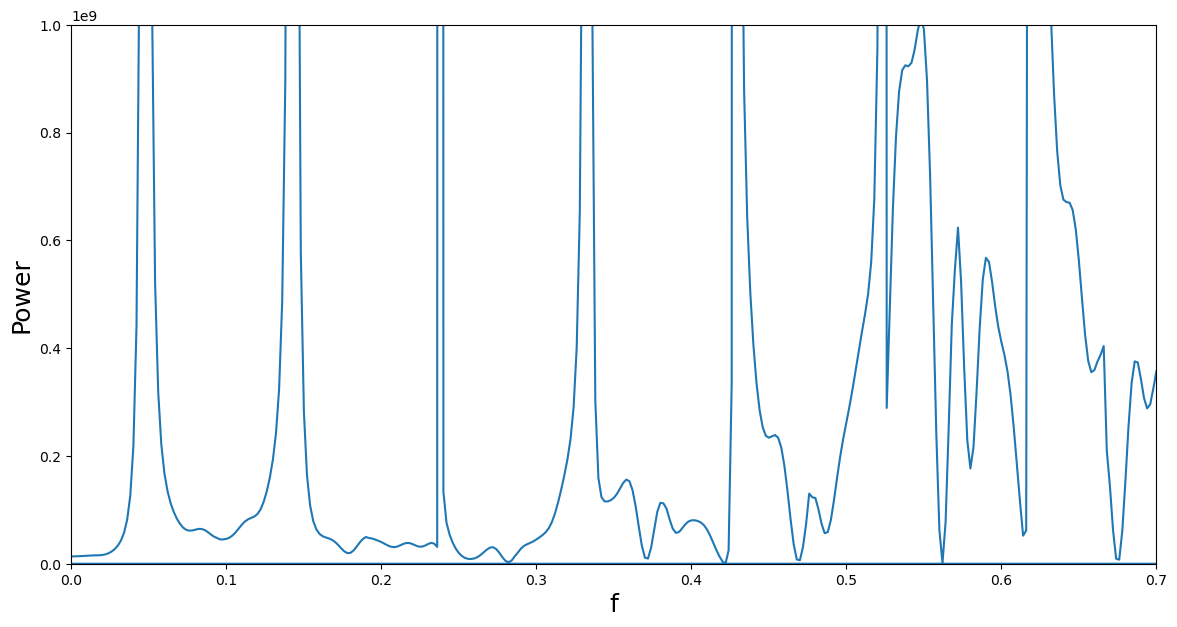

In [1]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import fft

# 定义微分方程(需要化为一个微分方程组)
def f(x, t, mu, eta, omega):
    x1, x2 = x
    dx = x2
    ddx = -mu * x2 + x1 - x1**3 + eta * np.cos(omega * t)
    return [dx, ddx]

# 时间序列（采样点）
t = np.linspace(0, 500, 500000)
dt = t[1] - t[0]

# 设定初始条件，分别为x[0]和x'[0]
x0 = [0, 1]

# 设定参数，分别是mu,eta和Omega
params = (0.132746, 74.25806, 0.299147)

# 解方程（调用Scipy的odeint()函数，分别传入f为微分方程，x0初始条件，t为时间序列，params传入了微分方程f所依赖的参数）
sol = odeint(f, x0, t, args=params)

# 微分方程的解，分别是角度（也就是x[t]），角速度（也就是x'[t]）
theta = sol[:, 0]
omega = sol[:, 1]

# 作时序图
fig1, ax1 = plt.subplots(figsize=(14,5))
ax1.plot(t, theta)
ax1.set_xlabel('t', fontsize=18)
ax1.set_ylabel('x', fontsize=18)

# 作相图
fig2, ax2 = plt.subplots(figsize=(14,7))
ax2.plot(theta, omega)
ax2.set_xlabel('x', fontsize=18)
ax2.set_ylabel('dx/dt', fontsize=18)

# 用FFT计算功率谱
power = np.abs(fft.fft(omega))**2
freq = fft.fftfreq(len(omega), dt)

# 作功率谱（这一部分作图不尽如人意，Mathematica作得更好）
fig3, ax3 = plt.subplots(figsize=(14,7))
ax3.plot(freq, power)
ax3.set_xlabel('f', fontsize=18)
ax3.set_ylabel('Power', fontsize=18)
ax3.set_xlim(0,0.7)
ax3.set_ylim(0,1e9)